In [94]:
import sympy

def build_acc_water( a, b, b0, dist, angle, tor ):
    X = a-b
    X = X / sympy.sqrt( X.dot(X) )
    Z = X.cross(b0-b)
    Z = Z / sympy.sqrt( Z.dot(Z) )
    Y = Z.cross(X)

    M=sympy.Matrix([[X[0],Y[0],Z[0]],[X[1],Y[1],Z[1]],[X[2],Y[2],Z[2]]])
    wat_loc = sympy.Matrix([
         dist * sympy.cos( ( 180.0-angle )*sympy.pi/180 ),
         dist * sympy.sin( ( 180.0-angle )*sympy.pi/180 ) * sympy.cos( tor*sympy.pi/180 ),
         dist * sympy.sin( ( 180.0-angle )*sympy.pi/180 ) * sympy.sin( tor*sympy.pi/180 )
    ])
    water = M*wat_loc + a
    return water

ax,ay,az = sympy.symbols('a0,a1,a2')
A = sympy.Matrix([ax,ay,az])
bx,by,bz = sympy.symbols('b0,b1,b2')
B = sympy.Matrix([bx,by,bz])
b0x,b0y,b0z = sympy.symbols('c0,c1,c2')
B0 = sympy.Matrix([b0x,b0y,b0z])
d,a,t = sympy.symbols('dist,angle,tors')
sympy.init_printing(False)

d=[
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'a0'),
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'a1'),
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'a2'),
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'b0'),
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'b1'),
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'b2'),
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'c0'),
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'c1'),
    sympy.diff(build_acc_water(A,B,B0,d,a,t),'c2')
]

repl,red = sympy.cse(d, symbols=sympy.utilities.iterables.numbered_symbols(start=101))

In [95]:
keysS = []
valsS = []
for key, val in repl:
    keysS.append(str(key))
    valsS.append(str(val))

lhsS = []
rhsS = []
for i in range(3):
    for j in range(3):
        for k in range(3):
            if (red[3*i+j][k]!=0):
                lhsS.append('dwda['+str(i)+','+str(j)+','+str(k)+']')
                rhsS.append(str(red[3*i+j][k]))

for i in range(len(keysS)):
    print (keysS[i],'=',valsS[i])
for i in range(len(lhsS)):
    print (lhsS[i],'=',rhsS[i])

x101 = -b2
x102 = a2 + x101
x103 = -b0
x104 = c0 + x103
x105 = a0 + x103
x106 = x105**2
x107 = -b1
x108 = a1 + x107
x109 = x108**2
x110 = x102**2
x111 = x106 + x109 + x110
x112 = 1/sqrt(x111)
x113 = x104*x112
x114 = c2 + x101
x115 = x112*x114
x116 = x102*x113 - x105*x115
x117 = c1 + x107
x118 = x112*x117
x119 = x105*x118 - x108*x113
x120 = -x102*x118 + x108*x115
x121 = x116**2 + x119**2 + x120**2
x122 = 1/sqrt(x121)
x123 = x111**(-3/2)
x124 = x123*(-a0 + b0)
x125 = x122*x124
x126 = x102*x125
x127 = x108*x125
x128 = x108*x112
x129 = x105*x124
x130 = x117*x129
x131 = x104*x124
x132 = x108*x131
x133 = x122*(x118 + x130 - x132)
x134 = -x115
x135 = x102*x131
x136 = x114*x129
x137 = x134 + x135 - x136
x138 = x102*x112
x139 = x122*x138
x140 = x116*x138
x141 = x121**(-3/2)
x142 = x108*x114
x143 = x124*x142
x144 = x102*x117
x145 = x124*x144
x146 = x120/2
x147 = 2*x118
x148 = x119/2
x149 = 2*x115
x150 = -x149
x151 = x116/2
x152 = x141*(-x146*(2*x143 - 2*x145) - x148*(2*x130 - 2*x132 + x147) - x1

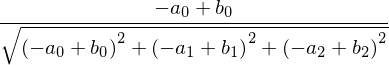

In [147]:
import sympy
ax,ay,az = sympy.symbols('a0,a1,a2')
bx,by,bz = sympy.symbols('b0,b1,b2')
sympy.diff( sympy.sqrt((bx-ax)**2+(by-ay)**2+(bz-az)**2), 'b0' )